# **COVID-19 Interactive Analysis Dashboard**


---


**What is COVID-19?**

Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1 'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`
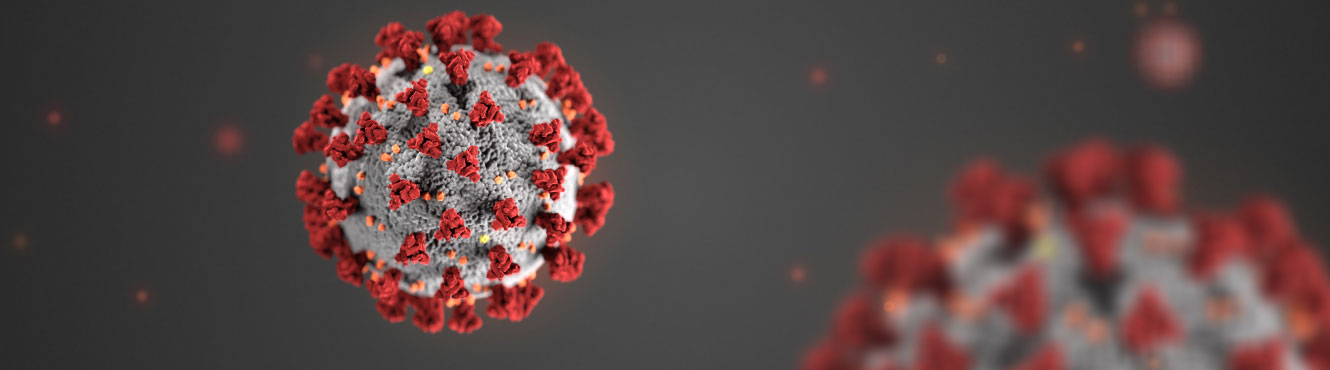

Importing required Libraries

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML


import pandas as pd
import numpy as np

Covid-19 dataset

In [2]:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [3]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6774,6804,6836,6864,6879,6879,6879,6936,6961,6978,6988,7000,7000,7000,7025,7031,7043,7047,7054,7054,7054,7076,7083,7090,7093,7101,7101,7101,7116,7118,7123,7127,7127,7127,7127,7141,7144,7151,7157,7164
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2457,2457,2457,2457,2458,2459,2459,2460,2460,2460,2460,2461,2463,2464,2466,2468,2471,2473,2475,2477,2478,2478,2480,2483,2486,2487,2490,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523,2528,2531,2535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4329,4370,4404,4441,4487,4520,4550,4578,4618,4654,4695,4730,4766,4794,4830,4867,4898,4929,4957,4984,5004,5034,5063,5096,5121,5148,5179,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471,5489,5519,5539
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128,128,128,128,128,128,128,128,129,129,129,129,129,129,129,129,129,129,129,129,129,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1018,1022,1026,1032,1042,1044,1049,1053,1057,1063,1070,1082,1086,1100,1103,1118,1125,1133,1138,1140,1153,1163,1166,1176,1182,1186,1192,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299,1309,1313,1322


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770,151770,151770,152142,152243,152363,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626,153736,153840,153962
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140,135550,135947,136147,136598,137075,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318,154316,155293
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902,186655,187258,187968,188663,189384,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962,199275,199560
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924,14924,14924,14954,14960,14976,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070,15078,15083
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328,44534,44617,44739,44972,45175,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349,49628,49943


In [5]:
country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Cases_28_Days',
       'Deaths_28_Days'],
      dtype='object')

In [6]:
#data cleaning - renaming
country_df.columns = map(str.lower, country_df.columns)
death_df.columns = map(str.lower, death_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [7]:
#renameing columns
confirmed_df = confirmed_df.rename(columns = {'province/state': 'state','country/region':'country'})
country_df = country_df.rename(columns = {'country_region':'country'})
death_df = death_df.rename(columns = {'province/state': 'state','country/region':'country'})
recovered_df = recovered_df.rename(columns = {'province/state': 'state','country/region':'country'})

In [8]:
country_df.dtypes

country                 object
last_update             object
lat                    float64
long_                  float64
confirmed                int64
deaths                   int64
recovered              float64
active                 float64
incident_rate          float64
people_tested          float64
people_hospitalized    float64
mortality_rate         float64
uid                      int64
iso3                    object
cases_28_days            int64
deaths_28_days           int64
dtype: object

In [9]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

In [10]:
sorted_country_df.head()

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,cases_28_days,deaths_28_days
181,US,2021-09-11 05:21:31,40.000000,-100.00000,40864047,659005,NaN,NaN,12403.104387,NaN,NaN,1.612677,840,USA,4266230,37793
79,India,2021-09-11 05:21:31,20.593684,78.96288,33208330,442317,NaN,NaN,2406.393078,NaN,NaN,1.331946,356,IND,1018461,11277
23,Brazil,2021-09-11 05:21:31,-14.235000,-51.92530,20974850,585846,NaN,NaN,9867.758900,NaN,NaN,2.793088,76,BRA,655850,17984
185,United Kingdom,2021-09-11 05:21:31,55.000000,-3.00000,7202212,134313,NaN,NaN,10609.273747,NaN,NaN,1.864885,826,GBR,960765,3197
144,Russia,2021-09-11 05:21:31,61.524000,105.31880,7000636,187768,NaN,NaN,4797.109607,NaN,NaN,2.682156,643,RUS,531746,21772


In [11]:
def highlight_col(x):
    r = 'background-color: red'
    p = 'background-color: purple'
    g = 'background-color: grey'
    temp_df = pd.DataFrame('',index=x.index, columns= x.columns)
    temp_df.iloc[:,4] = p
    temp_df.iloc[:,5] = r
    temp_df.iloc[:,6] = g
    return temp_df
    
sorted_country_df.style.apply(highlight_col, axis =None)

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3,cases_28_days,deaths_28_days
181,US,2021-09-11 05:21:31,40.000000,-100.000000,40864047,659005,nan,nan,12403.104387,nan,nan,1.612677,840,USA,4266230,37793
79,India,2021-09-11 05:21:31,20.593684,78.962880,33208330,442317,nan,nan,2406.393078,nan,nan,1.331946,356,IND,1018461,11277
23,Brazil,2021-09-11 05:21:31,-14.235000,-51.925300,20974850,585846,nan,nan,9867.758900,nan,nan,2.793088,76,BRA,655850,17984
185,United Kingdom,2021-09-11 05:21:31,55.000000,-3.000000,7202212,134313,nan,nan,10609.273747,nan,nan,1.864885,826,GBR,960765,3197
144,Russia,2021-09-11 05:21:31,61.524000,105.318800,7000636,187768,nan,nan,4797.109607,nan,nan,2.682156,643,RUS,531746,21772
62,France,2021-09-11 05:21:31,46.227600,2.213700,6972934,116049,nan,nan,10682.639537,nan,nan,1.664278,250,FRA,475149,3221
180,Turkey,2021-09-11 05:21:31,38.963700,35.243300,6613946,59384,nan,nan,7842.090546,nan,nan,0.897860,792,TUR,574119,6524
81,Iran,2021-09-11 05:21:31,32.427908,53.688046,5258913,113380,nan,nan,6261.135979,nan,nan,2.155959,364,IRN,899528,16638
6,Argentina,2021-09-11 05:21:31,-38.416100,-63.616700,5221809,113282,nan,nan,11553.754237,nan,nan,2.169401,32,ARG,147084,4467
37,Colombia,2021-09-11 05:21:31,4.570900,-74.297300,4926772,125529,nan,nan,9682.572238,nan,nan,2.547895,170,COL,66150,2308


In [12]:
import plotly.express as px

In [13]:
fig = px.scatter(sorted_country_df.head(10), x= 'country',y='confirmed',size= 'confirmed',color='country', hover_name='country',size_max=60)
fig.update_layout()
fig.show()

In [14]:
import plotly.graph_objects as go

def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
        print(i)
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();


plot_cases_of_a_country('US')
#interact(plot_cases_of_a_country,country='world');

0
1


In [15]:
interact(plot_cases_of_a_country, country='World')

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_cases_of_a_country>

In [16]:
!pip install folium
import folium

In [17]:
confirmed_df.dropna(axis=0,inplace=True)

In [18]:
world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map